In [1]:
print("created by: \u0930\u094b\u0936\u0928\u0940 \u0917\u094c\u095c")

created by: रोशनी गौड़


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("This is a warning!")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import random
import numpy as np
import matplotlib.pyplot as plt

In [47]:
mnist_dataset = np.load('mnist.npz')

In [49]:
x_train = mnist_dataset['x_train']
y_train = mnist_dataset['y_train']
x_test = mnist_dataset['x_test']
y_test = mnist_dataset['y_test']

In [5]:
max_value_train = np.max(x_train)
max_value_test = np.max(x_test)

In [7]:
max_value = max(max_value_train, max_value_test)
print(f"Using max value {max_value} to normalize the data")

Using max value 255 to normalize the data


In [8]:
x_train = x_train / max_value
x_test = x_test / max_value

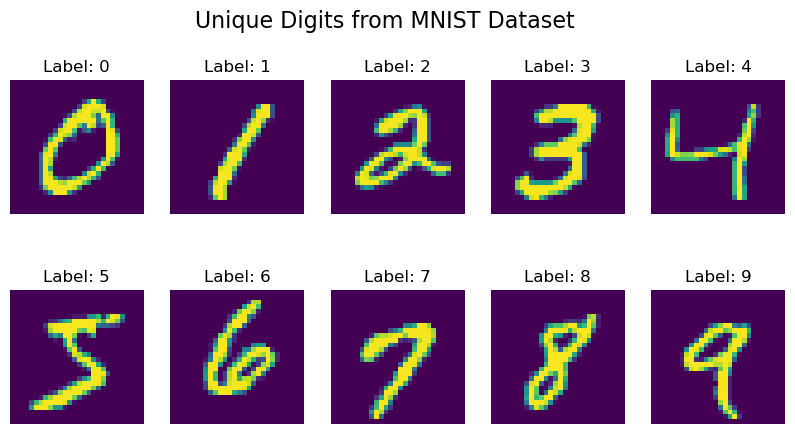

In [9]:
unique_labels, indices = np.unique(y_train, return_index=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# flatten the axes array for easy iteration
axes = axes.flatten()

for i, label in enumerate(unique_labels):
    axes[i].imshow(x_train[indices[i]])
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.suptitle("Unique Digits from MNIST Dataset", fontsize=16)
plt.show()

In [10]:

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),             # Input layer: flattens 28x28 → 784
    layers.Dense(256, activation='relu'),             # First hidden layer
    layers.Dropout(0.2),                               # Dropout to prevent overfitting
    layers.Dense(128, activation='tanh'),             # Second hidden layer
    layers.Dropout(0.2),
    layers.Dense(64, activation=tf.nn.leaky_relu),              # Third hidden layer
    layers.Dense(10, activation='softmax')            # Output layer for 10 classes
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  #gradientbased with learning rate
    loss='sparse_categorical_crossentropy', #multiclass
    metrics=['accuracy'],
    loss_weights=None,                         # You can add weights if multiple losses
    run_eagerly=False,                         # Run graph mode for performance (True for debugging)
    jit_compile=True                           # Enable XLA compilation for faster training
)

In [13]:
# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitors validation loss
    patience=3,              # Stops if no improvement after 3 epochs
    restore_best_weights=True # Restores the best model weights
)

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=30,                # Try up to 30 epochs
    validation_split=0.2,     # 20% of training data for validation
    callbacks=[early_stop],   # Apply early stopping
    verbose=2
)

Epoch 1/30
1500/1500 - 10s - 7ms/step - accuracy: 0.9178 - loss: 0.2699 - val_accuracy: 0.9604 - val_loss: 0.1235
Epoch 2/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9589 - loss: 0.1318 - val_accuracy: 0.9713 - val_loss: 0.0980
Epoch 3/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9693 - loss: 0.0991 - val_accuracy: 0.9705 - val_loss: 0.1039
Epoch 4/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9743 - loss: 0.0804 - val_accuracy: 0.9741 - val_loss: 0.0866
Epoch 5/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9773 - loss: 0.0715 - val_accuracy: 0.9734 - val_loss: 0.0907
Epoch 6/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9797 - loss: 0.0617 - val_accuracy: 0.9740 - val_loss: 0.0891
Epoch 7/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9824 - loss: 0.0548 - val_accuracy: 0.9783 - val_loss: 0.0813
Epoch 8/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9841 - loss: 0.0481 - val_accuracy: 0.9769 - val_loss: 0.0882
Epoch 9/30
1500/1500 - 7s - 5ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9787 -

In [15]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.9769 - loss: 0.0786
Test Accuracy: 97.69%


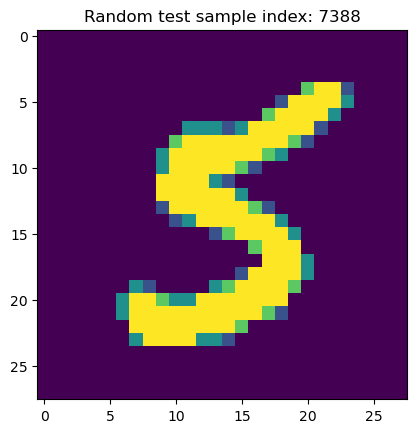

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
The predicted class ie Handwritten number in the image is: 5


In [16]:
n = random.randint(0, len(x_test) - 1)
single_image = x_test[n]
image_batch = np.expand_dims(single_image, axis=0) #adding a new dimension
image_to_plot = single_image.reshape(28, 28)
plt.imshow(image_to_plot)
plt.title(f"Random test sample index: {n}")
plt.show()

predicted_values = model.predict(image_batch)
predicted_class = np.argmax(predicted_values[0])
print(f"The predicted class ie Handwritten number in the image is: {predicted_class}")

In [17]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is= 5


In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

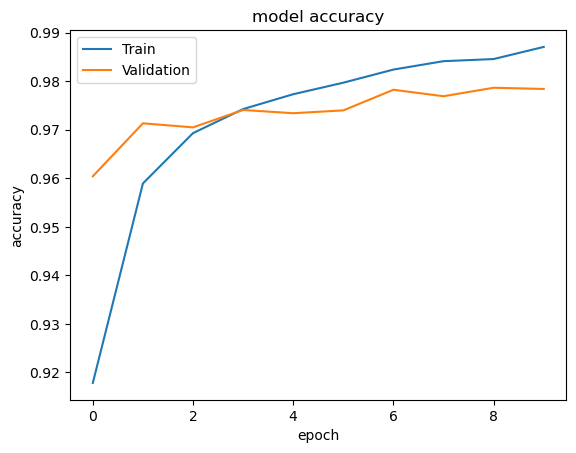

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

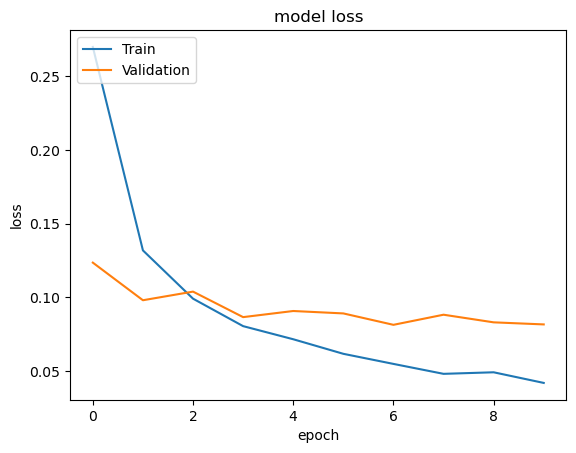

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
